In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
lng_df = pd.read_csv("LNG.csv")
spy_df = pd.read_csv("SPY.csv")

### Explore the data with some EDA

First, let's explore the data. Any time we begin a machine learning (ML) project, we need to first do some exploratory data analysis (EDA) to familiarize ourselves with the data. This includes things like:

- raw data plots
- histograms
- and more…
I typically begin with raw data plots and histograms. This allows us to understand our data's distributions. If it's a normal distribution, we can use things like parametric statistics.

There are two stocks loaded for you into pandas DataFrames: lng_df and spy_df (LNG and SPY). Take a look at them with .head(). We'll use the closing prices and eventually volume as inputs to ML algorithms.

Note: We'll call plt.clf() each time we want to make a new plot, or f = plt.figure().

In [8]:
print(lng_df.head())  # examine the DataFrames
print(spy_df.head())  # examine the SPY DataFrame

         Date  Adj_Close  Adj_Volume
0  1994-04-04       72.0         0.0
1  1994-04-05      108.0         0.0
2  1994-04-06      108.0         0.0
3  1994-04-07      108.0         0.0
4  1994-04-08      108.0         0.0
         Date  Adj_Close  Adj_Volume
0  1993-01-29  28.223927   1003200.0
1  1993-02-01  28.424666    480500.0
2  1993-02-02  28.484856    201300.0
3  1993-02-03  28.785997    529400.0
4  1993-02-04  28.906440    531500.0


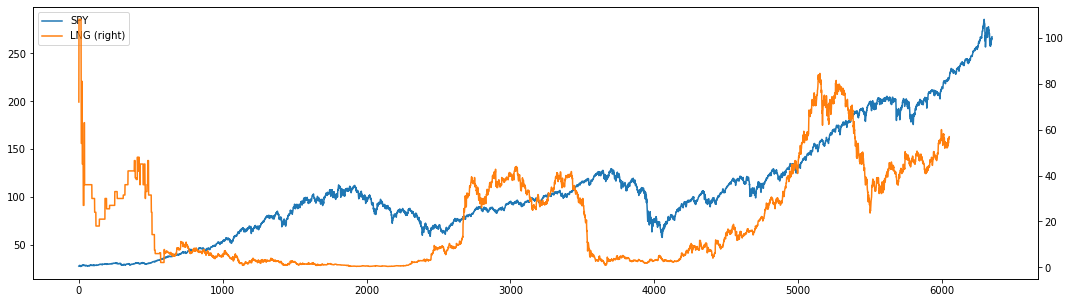

<Figure size 432x288 with 0 Axes>

In [12]:
# Plot the Adj_Close columns for SPY and LNG
plt.figure(figsize = (18, 5))
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend= True, secondary_y=True)

plt.show()  # show the plot
plt.clf()  # clear the plot space


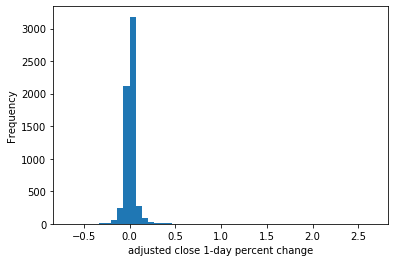

In [11]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

### Corr
- Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly. 
- Pearson's correlation coefficient is often used, which only detects linear relationships. It's commonly assumed our data is normally distributed, which we can "eyeball" from histograms. Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

- If we use the same time periods for previous price changes and future price changes, we can see if the stock price is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.034733
5d_close_future_pct     -0.034733             1.000000


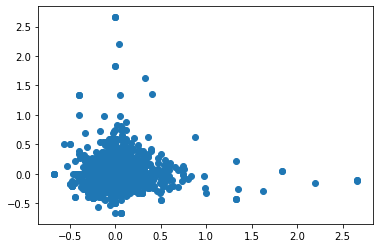

In [13]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()